___
# PROJETO 1

## <font color='red'>Juliana Costa Pessoa</font>
___

## <font color='blue'>Perfil dos aposentados</font>

## Introdução

   A análise foi feita a partir da divisão de aposentados dos não aposentados. Dentre os não aposentados, filtrou-se as pessoas de referência, em busca de fazer uma comparação razoável, e não incluir crianças, por exemplo.
   As variáveis foram escolhidas com foco no trabalho e outras questões relacionadas.

   O link abaixo relata características da população de idosos, como causa mortis, sexo, estado conjugal, distribuição espacial etc. Tais variáveis foram apresentadas com números absolutos e relativos, através de tabelas cruzadas, histogramas e gráficos de linhas.
    
   (https://www.nescon.medicina.ufmg.br/biblioteca/imagem/0191.pdf)




___
## Análise e Resultados

In [187]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [188]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\pesso\Documents\CIÊNCIA DOS DADOS\PROJETO1


In [189]:
dados = pd.read_table('pes2014certo.txt', encoding="windows-1252", sep=",")

In [190]:
# Aposentados

d = pd.DataFrame()

ap = dados[dados.V9122 == 2]

d["renda"] = ap.V4750
d["nivel de instrução"] = ap.V4745
d["sabe ler/escrever"] = ap.V0601
d["condicao de atividade no trabalho"] = ap.V4713
d["anos de estudo"] = ap.V4803
d["tempo diário da residência para o trabalho"] = ap.V9057
d["recebe auxílio para transporte"] = ap.V9045

d.head()

,renda,nivel de instrução,sabe ler/escrever,condicao de atividade no trabalho,anos de estudo,tempo diário da residência para o trabalho,recebe auxílio para transporte
5,724,2,1,2,3,NaN,NaN
11,855,2,1,2,4,NaN,NaN
25,2362,2,1,1,2,1,NaN
26,2362,5,1,2,12,NaN,NaN
51,444,1,1,2,1,NaN,NaN


In [191]:
# Não aposentados
ativo = dados[dados.V9122 == 4]

In [192]:
# Pessoas de referência na família/chefes de família 

d1 = pd.DataFrame()

ref = ativo[ativo.V0402 == 1]

d1["renda"] = ref.V4750
d1["nivel de instrução"] = ref.V4745
d1["sabe ler/escrever"] = ref.V0601
d1["condicao de atividade no trabalho"] = ref.V4713
d1["anos de estudo"] = ref.V4803
d1["tempo diário da residência para o trabalho"] = ref.V9057
d1["recebe auxílio para transporte"] = ref.V9045

d1.head()

,renda,nivel de instrução,sabe ler/escrever,condicao de atividade no trabalho,anos de estudo,tempo diário da residência para o trabalho,recebe auxílio para transporte
0,500,3,1,1,9,1,3
3,1150,2,1,1,6,1,3
6,1700,4,1,1,10,NaN,NaN
15,850,2,1,1,5,1,3
17,3220,2,1,1,8,1,1


## <font color='grey'> Frequências relativas: condição de atividade no trabalho, alfabetização, nível de instrução

In [193]:
d.condicao = ap.V4713.astype('category')
d.condicao.cat.categories = ('economicamente ativos', 'não ativos economicamente')

n = dados.shape[0]

list(dados)

print('Frequências relativas por condição de trabalho dos aposentados:')
ut1 = (d.condicao.value_counts()/n*100).round(decimals=1)
print(ut1,'\n')

Frequências relativas por condição de trabalho dos aposentados:
não ativos economicamente    7.5
economicamente ativos        3.1
dtype: float64 



In [194]:
d1.condicao = ref.V4713.astype('category')
d1.condicao.cat.categories = ('economicamente ativos', 'não ativos economicamente')

print('Frequências relativas por condição de trabalho dos não aposentados:')
ut2 = (d1.condicao.value_counts()/n*100).round(decimals=1)
print(ut2,'\n')

Frequências relativas por condição de trabalho dos não aposentados:
economicamente ativos        23.5
não ativos economicamente     3.9
dtype: float64 



In [218]:
d.sabe = ap.V0601.astype('category')
d.sabe.cat.categories = ('sim', 'não')

print('Frequências relativas por alfabetização dos aposentados:')
ut3 = (d.sabe.value_counts()/n*100).round(decimals=1)
print(ut3,'\n')

Frequências relativas por alfabetização dos aposentados:
sim    8.3
não    2.3
dtype: float64 



In [219]:
d1.sabe = ref.V0601.astype('category')
d1.sabe.cat.categories = ('sim', 'não')

print('Frequências relativas por alfabetização dos não aposentados:')
ut4 = (d1.sabe.value_counts()/n*100).round(decimals=1)
print(ut4,'\n')

Frequências relativas por alfabetização dos não aposentados:
sim    25.4
não     2.1
dtype: float64 



In [220]:
d.nivel = ap.V4745.astype('category')
d.nivel.cat.categories = ('Sem instrução', 
                          'Fundamental incompleto ou equivalente',
                          'Fundamental completo ou equivalente',
                          'Médio incompleto ou equivalente', 
                          'Médio completo ou equivalente',
                          'Superior incompleto ou equivalente',
                          'Superior completo',
                          'Não determinado')

print('Frequências relativas por nível de instrução dos aposentados:')
ut5 = (d.nivel.value_counts()/n*100).round(decimals=1)
print(ut5,'\n')

Frequências relativas por nível de instrução dos aposentados:
Fundamental incompleto ou equivalente    4.4
Sem instrução                            2.7
Médio completo ou equivalente            1.4
Superior completo                        1.1
Fundamental completo ou equivalente      0.7
Médio incompleto ou equivalente          0.2
Superior incompleto ou equivalente       0.1
Não determinado                          0.0
dtype: float64 



In [222]:
d1.nivel = ref.V4745.astype('category')
d1.nivel.cat.categories = ('Sem instrução', 
                          'Fundamental incompleto ou equivalente',
                          'Fundamental completo ou equivalente',
                          'Médio incompleto ou equivalente', 
                          'Médio completo ou equivalente',
                          'Superior incompleto ou equivalente',
                          'Superior completo',
                          'Não determinado')

print('Frequências relativas por nível de instrução dos não aposentados:')
ut6 = (d1.nivel.value_counts()/n*100).round(decimals=1)
print(ut6,'\n')

Frequências relativas por nível de instrução dos não aposentados:
Fundamental incompleto ou equivalente    8.6
Médio completo ou equivalente            7.5
Superior completo                        3.2
Fundamental completo ou equivalente      2.9
Sem instrução                            2.4
Médio incompleto ou equivalente          1.6
Superior incompleto ou equivalente       1.2
Não determinado                          0.1
dtype: float64 



## <font color='darkgreen'> Gráfico: nível de alfabetização dos aposentados

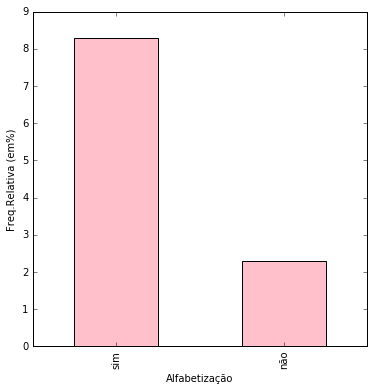

In [228]:
plot = ut3.plot(kind='bar',title=' ',figsize=(6, 6),color=('pink'))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Alfabetização')

## <font color='darkgreen'> Gráfico: nível de alfabetização dos não aposentados

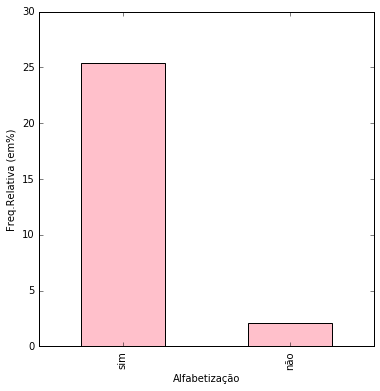

In [229]:
plot = ut4.plot(kind='bar',title=' ',figsize=(6, 6),color=('pink'))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Alfabetização')

## <font color='olivedrab'> Gráfico: nível de instrução dos aposentados

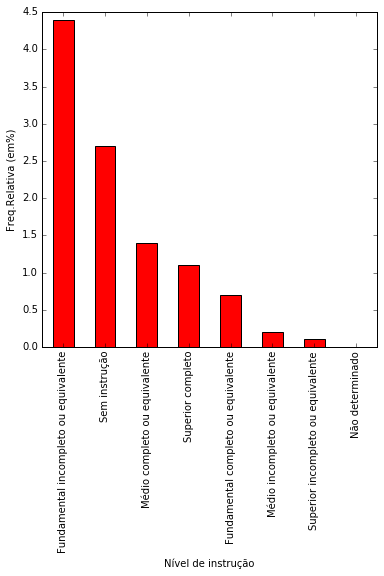

In [225]:
plot = ut5.plot(kind='bar',title=' ',figsize=(6, 6),color=('r'))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Nível de instrução')

## <font color='olivedrab'> Gráfico: nível de instrução dos não aposentados

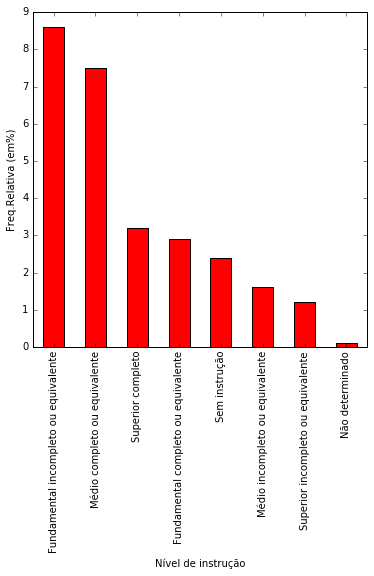

In [224]:
plot = ut6.plot(kind='bar',title=' ',figsize=(6, 6),color=('r'))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Nível de instrução')

## <font color='tear'> Gráfico: condição de trabalho dos aposentados

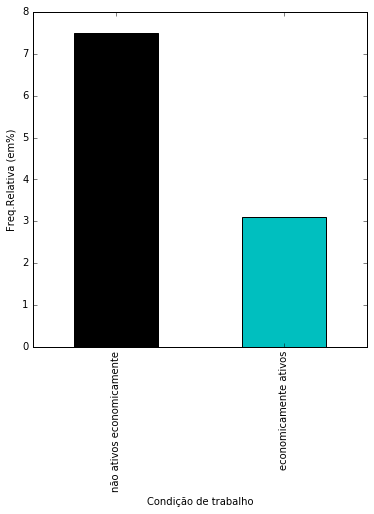

In [195]:
plot = ut1.plot(kind='bar',title=' ',figsize=(6, 6),color=('k','c'))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Condição de trabalho')

## <font color='tear'> Gráfico: condição de trabalho dos não aposentados

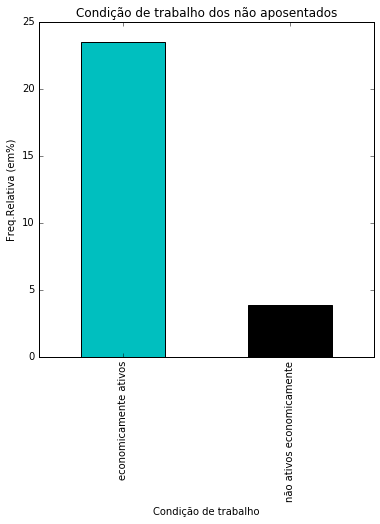

In [196]:
plot = ut2.plot(kind='bar',title='Condição de trabalho dos não aposentados',figsize=(6, 6),color=('c','k'))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Condição de trabalho')

Comparando os dois histogramas, têm-se que a maioria dos aposentados não são ativos economicamente, enquanto os não aposentados são, em sua maioria, economicamente ativos. Um dos motivos para isso acontecer é a perda de direitos que os aposentados têm ao continuar trabalhando.

O aposentado que continua trabalhando é obrigado a continuar contribuindo com a Previdência, mas não tem acesso aos mesmos direitos de uma pessoa ativa. É como se a aposentadoria o "impedisse" de receber outros benefícios.

Em uma época de dificuldade para encontrar emprego, ainda mais em idade avançada, esse é mais um fator que não estimula os aposentados a continuarem economicamente ativos.

Além disso, com os dados apresentados acima, pode-se concluir que os aposentados tem uma porcentagem menor de alfabetizados e apenas 1,1% deles têm superior completo, contra 3,2% dos não aposentados com superior completo.

Todos esses fatores dificultam a entrada do aposentado no mercado de trabalho.

## <font color='tomato'> Frequências relativas: tempo gasto da residência ao trabalho

In [197]:
ap.tempo = ap.V9057.astype('category')
ap.tempo.cat.categories = ('até 30 minutos', 
                          'mais de 30 até 1 hora',
                          'mais de 1 até 2 horas',
                          'mais de 2 horas')

ut3 = (ap.tempo.value_counts()/n*100).round(decimals=1)
print("Frequência relativa do tempo da residência ao trabalho dos aposentados: ")
print(ut3,'\n')

Frequência relativa do tempo da residência ao trabalho dos aposentados: 
até 30 minutos           0.9
mais de 30 até 1 hora    0.3
mais de 1 até 2 horas    0.1
mais de 2 horas          0.0
dtype: float64 



In [198]:
ref.tempo = ref.V9057.astype('category')
ref.tempo.cat.categories = ('até 30 minutos', 
                          'mais de 30 até 1 hora',
                          'mais de 1 até 2 horas',
                          'mais de 2 horas')

ut4 = (ref.tempo.value_counts()/n*100).round(decimals=1)
print("Frequência relativa do tempo da residência ao trabalho dos não aposentados: ")
print(ut4,'\n')

Frequência relativa do tempo da residência ao trabalho dos não aposentados: 
até 30 minutos           11.1
mais de 30 até 1 hora     4.0
mais de 1 até 2 horas     1.5
mais de 2 horas           0.4
dtype: float64 



## <font color='skyblue'> Gráficos: tempo gasto da residência ao trabalho

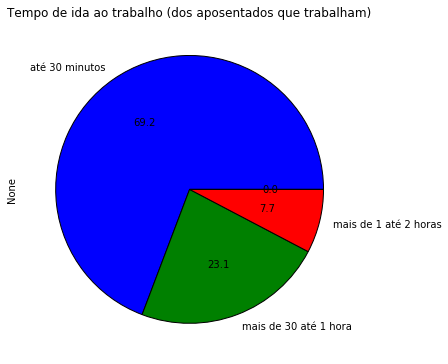

In [199]:
plot = ut3.plot(kind='pie', title='Tempo de ida ao trabalho (dos aposentados que trabalham)',
                autopct='%.1f', figsize=(6,6))

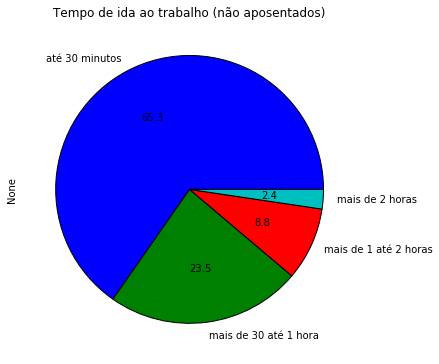

In [200]:
plot = ut4.plot(kind='pie', title='Tempo de ida ao trabalho (não aposentados)',autopct='%.1f', figsize=(6,6))

Apesar de a grande maioria dos aposentados não trabalharem, os que trabalham demoram um tempo curto de deslocamento, o que é um bom indicativo.

## <font color='salmon'> Histograma: anos de estudo dos aposentados

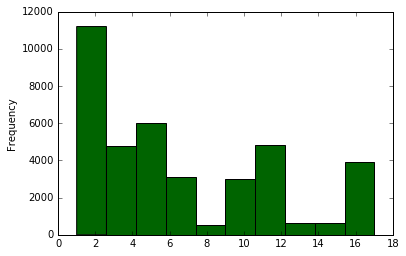

In [201]:
plot = ap.V4803.plot(kind='hist', color=('darkgreen')) 

## <font color='salmon'> Histograma: anos de estudo dos não aposentados

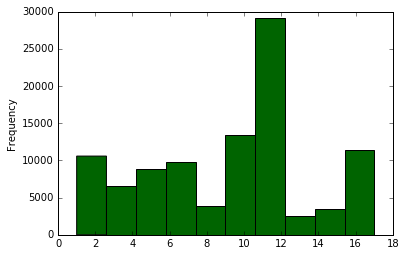

In [202]:
plot = ref.V4803.plot(kind='hist', color=('darkgreen')) 

Os aposentados, naturalmente, já têm obstáculos ao tentar ingressar no mercado de trabalho devido à idade, dificuldade de entrosamento no novo emprego, menor flexibilidade etc. 

Além disso, os histogramas apontam que, numa média, os aposentados têm menor tempo de estudo, outro fator que influencia a inserção no mercado de trabalho.

(http://economia.uol.com.br/blogs-e-colunas/coluna/daniela-lago/2014/08/12/dilemas-da-idade-no-mercado-de-trabalho.htm)


In [203]:
trabalham1 = ap[ap.V4713 == 1]
trabalham2 = ref[ref.V4713 == 1]

auxilio1 = ap[ap.V9045 == 1]
auxilio2 = ref[ref.V9045 == 1]

In [204]:
df = pd.DataFrame({"trabalham": pd.Series({"aposentados": trabalham1.V4713.count(), 
                                           "não aposentados": trabalham2.V4713.count()}),
                   "ganham auxílio transporte": pd.Series({"aposentados": auxilio1.V9045.count(), 
                                                           "não aposentados": auxilio2.V9045.count()})})

## <font color='navy'> Gráfico: economicamente ativos e o auxílio transporte

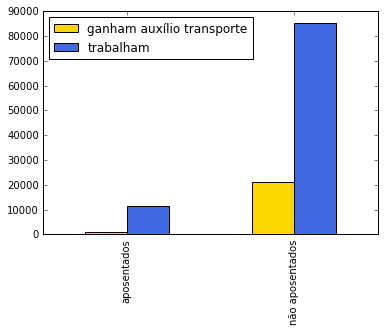

In [205]:
plot = df.plot(kind='bar', color=('gold','royalblue'))

## <font color='teal'> Tabela cruzada: aposentados economicamente ativos e auxílio transporte

In [206]:
d.condicao = ap.V4713.astype('category')
d.condicao.cat.categories = ('economicamente ativo', 'não ativo economicamente')

d.recebe = ap.V9045.astype('category')
d.recebe.cat.categories = ('sim', 'não')

print("Tabela cruzada: ")
ct=pd.crosstab(d.condicao,d.recebe,margins=False,rownames=['condição de trabalho'],colnames=["recebe auxílio transporte"])
ct

Tabela cruzada: 


recebe auxílio transporte,sim,não
condição de trabalho,,
economicamente ativo,828,2008
não ativo economicamente,0,0


## <font color='teal'> Tabela cruzada: não aposentados economicamente ativos e auxílio transporte

In [207]:
d1.recebe = ref.V9045.astype('category')
d1.recebe.cat.categories = ('sim', 'não')

print("Tabela cruzada: ")
ct=pd.crosstab(d1.condicao,d1.recebe,margins=False,rownames=['condição de trabalho'],colnames=["recebe auxílio transporte"])
ct

Tabela cruzada: 


recebe auxílio transporte,sim,não
condição de trabalho,,
economicamente ativos,21185,31674
não ativos economicamente,0,0


In [231]:
rendasap = d[ap.V4750 < 900000000000]

In [232]:
rendasref = d1[ref.V4750 < 900000000000]

In [233]:
# Porcentagem dos aposentados que trabalham e ganham auxílio transporte

porcentagem1 = (828/2008)*100
porcentagem1

41.235059760956176

In [234]:
# Porcentagem dos não aposentados que trabalham e ganham auxílio transporte

porcentagem2 = (21185/31674)*100
porcentagem2

66.88451095535771

O gráfico, as tabelas cruzadas e as porcentagens indicam que a quantidade de aposentados que são ativos economicamente é pequena (como já analisado anteriormente). Dentre esses poucos que trabalham, apenas 41,23% recebe auxílio transporte. 

Dos não aposentados que trabalham, cerca de 67% recebe auxílio transporte.

## <font color='yellowgreen'> Médias das rendas mensais familiar per capita

In [235]:
# Aposentados
rendasap.renda.mean()

1531.4806911119535

In [236]:
# Não aposentados
rendasref.renda.mean()

1109.592488301793

## <font color='crimson'> Medianas: rendas familiares per capita

In [237]:
# Aposentados
rendasap.renda.median()

886.0

In [238]:
# Não aposentados
rendasref.renda.median()

688.0

## <font color='orange'> Boxplot: renda familiar mensal per capita dos aposentados

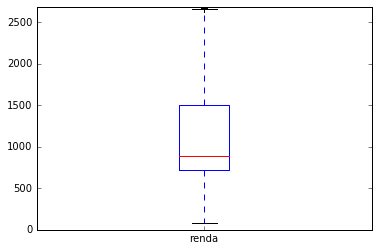

In [239]:
plot = rendasap.renda.plot(kind='box', ylim=(0,2690))

## <font color='orange'> Boxplot: renda familiar mensal per capita dos não aposentados

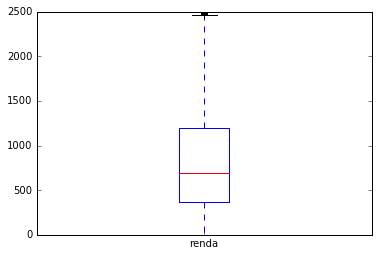

In [240]:
plot = rendasref.renda.plot(kind='box', ylim=(0,2500))

   A média e a mediana da renda familiar per capita dos aposentados é maior que a renda familiar per capita dos não aposentados, mas mesmo assim não há uma grande diferença entre elas, o que é um bom indicativo. 
   
   Segundo uma pesquisa baseada numa dissertação de mestrado de Economia do Insper, 95% dos brasileiros não precisariam poupar durante a idade ativa para garantir o mesmo padrão de vida depois de se aposentarem. E, mesmo sem poupar, a tendência seria que a renda per capita aumentasse com a aposentadoria. Tal sinal é refletido nas amostras acima.

(http://www.insper.edu.br/conhecimento/financas-e-contabilidade/brasileiro-poupa-suficiente-aposentadoria/?utm_source=facebook&utm_medium=post&utm_campaign=PrevidBrito_2508)


___
## Conclusão 

Descreva aqui suas conclusões!

Ao final dessa análise de dados, tem-se que é relativo afirmar se os aposentados estão melhores ou piores. Cabe aqui, a avaliação das variáveis de forma individual. 

Por exemplo, investigando a renda familiar mensal per capita, os aposentados tendem a estar melhores.
Enquanto isso, analisando os dados de recebimento de auxílio transporte aos que trabalham, os aposentados estão piores, visto que apenas pouco mais de 40% o recebe.
